# Поиск лиц на фотографии

Поиск лиц на фотографии с использованием библиотеки CV2.  
На исходной фотографии необходимо найти и выделить искомое лицо.



In [ ]:
!pip install face-recognition

## Импортируем библиотеки

In [3]:
import face_recognition
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont 
from matplotlib import pyplot as plt

## Посик лиц на картинке (object detection)

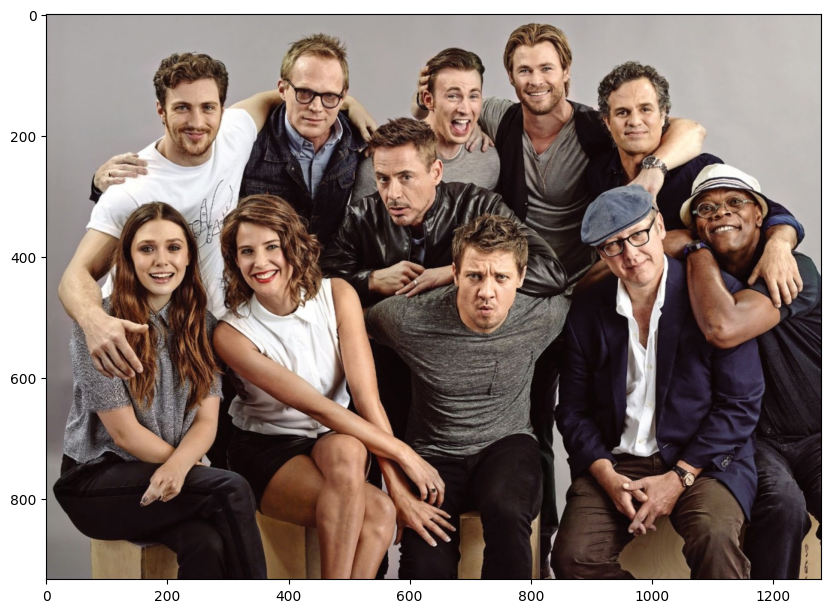

In [4]:
#получим картинку и отобразим ее
im = cv2.imread('/content/drive/MyDrive/Colab Notebooks/img_pack/3024035_904730.jpg')
rgb_image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10, 10))
plt.imshow(rgb_image)
plt.show()

In [5]:
%%time
#распознование лиц на картинке    
face_locations = face_recognition.face_locations(im, number_of_times_to_upsample=2, model='cnn')
#координаты распознаных лиц
face_locations

CPU times: user 3.62 s, sys: 2.41 s, total: 6.03 s
Wall time: 19.4 s


[(278, 1160, 380, 1058),
 (103, 737, 205, 635),
 (64, 845, 149, 760),
 (113, 283, 215, 181),
 (98, 484, 183, 399),
 (113, 1016, 215, 914),
 (356, 389, 441, 304),
 (351, 231, 453, 129),
 (237, 623, 339, 521),
 (402, 778, 504, 676),
 (340, 1016, 442, 914)]

#### Выведем найденые лица

In [6]:
print('Найдено лиц -', len(face_locations))

Найдено лиц - 11


лицо распознаноего координаты: 278 1160 380 1058


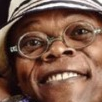

лицо распознаноего координаты: 103 737 205 635


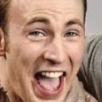

лицо распознаноего координаты: 64 845 149 760


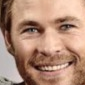

лицо распознаноего координаты: 113 283 215 181


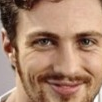

лицо распознаноего координаты: 98 484 183 399


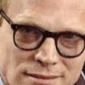

лицо распознаноего координаты: 113 1016 215 914


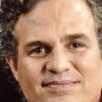

лицо распознаноего координаты: 356 389 441 304


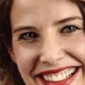

лицо распознаноего координаты: 351 231 453 129


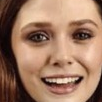

лицо распознаноего координаты: 237 623 339 521


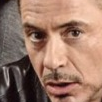

лицо распознаноего координаты: 402 778 504 676


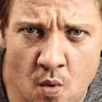

лицо распознаноего координаты: 340 1016 442 914


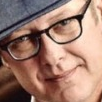

In [10]:
#Координатй лиц и их изображения
for face_loc in face_locations:
  #координаты
  top, right, bottom, left = face_loc
  print('лицо распознаноего координаты:', top, right, bottom, left)

  #вывод на печать лицо
  face_image = rgb_image[top:bottom, left:right]
  pil_image = Image.fromarray(face_image)
  display(pil_image)

## Поиск заданого лица на картинке

In [47]:
# полчим переменную искомой персоны
nick_image = face_recognition.load_image_file('/content/drive/MyDrive/Colab Notebooks/img_pack/el_test.jpg')
nick_face_recognition = face_recognition.face_encodings(nick_image)[0]
nick_image_2 = face_recognition.load_image_file('/content/drive/MyDrive/Colab Notebooks/img_pack/rdm295.jpg')
nick_face_recognition_2 = face_recognition.face_encodings(nick_image_2)[0]


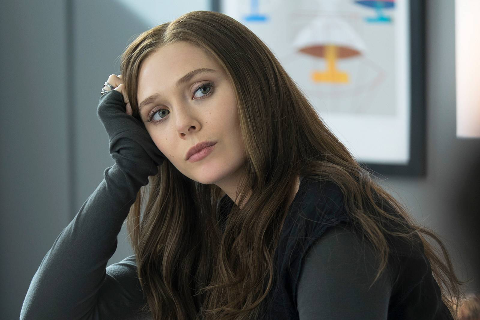

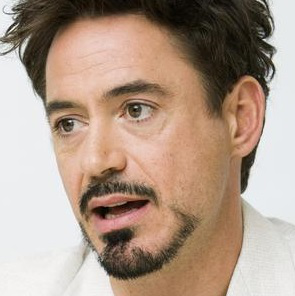

In [48]:
#уменьшим размер картинки
scale = 30
width = int(nick_image.shape[1] * scale / 100)
height = int(nick_image.shape[0] * scale / 100)
nick_image = cv2.resize(nick_image, (width, height))

#выведим лица персон
display(Image.fromarray(nick_image))
print()
display(Image.fromarray(nick_image_2))

In [50]:
#список искомых лиц
known_face_encodings = [nick_face_recognition, nick_face_recognition_2]
#имена людей которых ищем
known_face_name = ['E.Olsen', 'R.Downey']

In [51]:
#получаем картинку на которой ищем персоны
unknown_image = face_recognition.load_image_file('/content/drive/MyDrive/Colab Notebooks/img_pack/3024035_904730.jpg')

In [52]:
#Определяем все лица на картинке
face_loc = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_loc)

In [53]:
#создаем изображение
pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

In [54]:
for (top, right, bottom, left), face_encoding in zip(face_loc, face_encodings):
  #ищем соотвествия
  matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
  known_name = 'Неизвестно'

  face_distances = face_recognition.face_distance(known_face_encodings, face_encoding) 
  best_match_index = np.argmin(face_distances)

  if matches[best_match_index]:
     known_name = known_face_name[best_match_index]
     print('Найдено: ', known_name)

     #обведем в квадрат найденное лицо
     draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 0))


Найдено:  E.Olsen
Найдено:  R.Downey


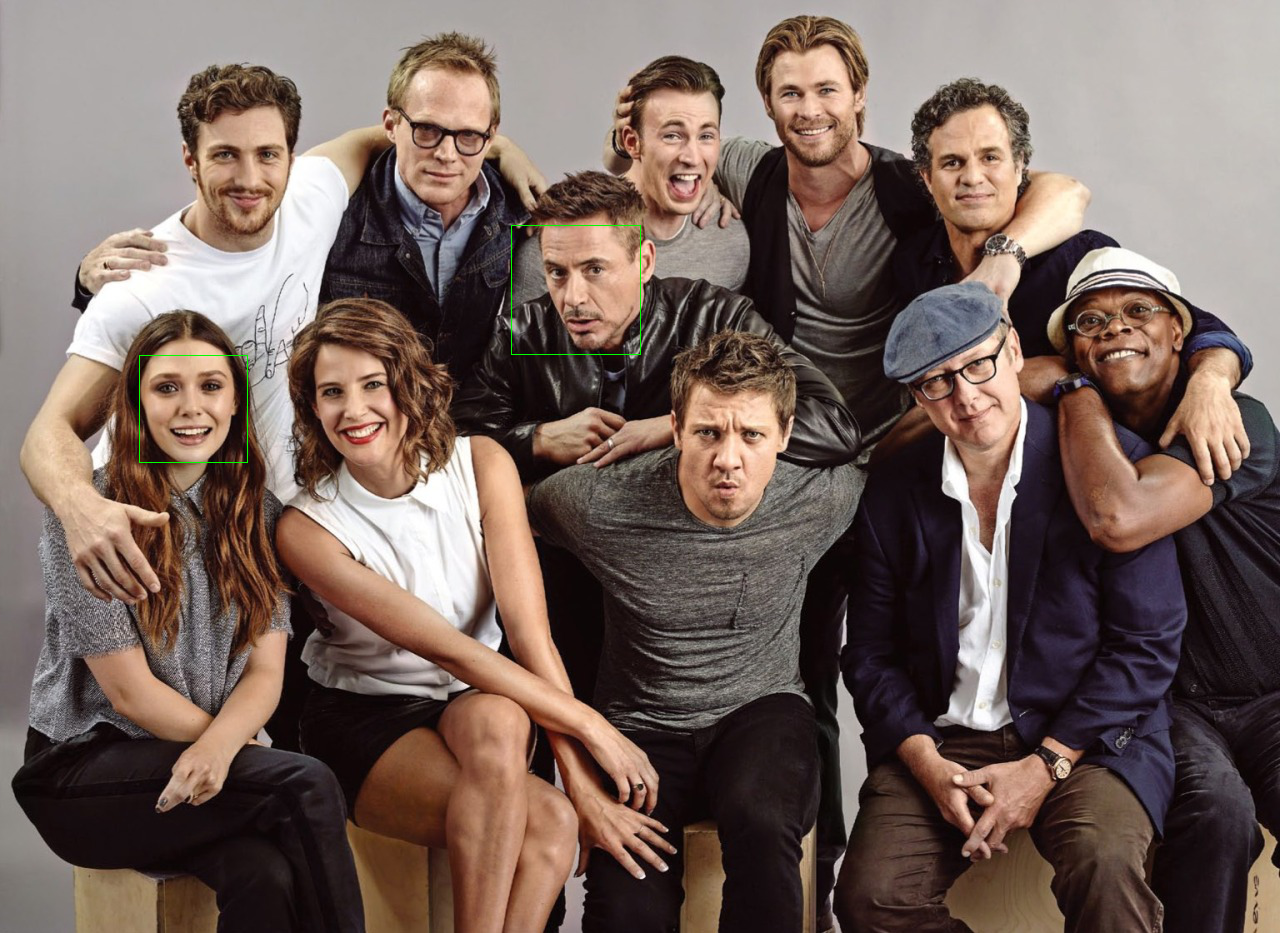

In [55]:
#выводим размеченную картинку
display(pil_image)

In [ ]:
#сохранение размеченной картинки
pil_image.save('oslen.jpg')